## Visualizing Activation Functions - Lab

## Introduction

Now that you've built your own CNN and seen how to visualize feature maps, its time to practice loading a pretrained model from file and visualize the learned features systematically. In this lab, you'll expand upon the code from the previous lesson in order to succinctly visualize all the channels from each layer in a CNN.

## Objectives

In this lab you will: 

- Load a saved Keras model 
- Use Keras methods to visualize the activation functions in CNNs 

## Load a Model  

For this lab, load the saved model `'chest_xray_all_with_augmentation_data.h5'`. This saved file includes both the model architecture and the trained weights. See the `model.save()` method for further details. The model was built in order to help identify patients with pneumonia. Start simply by loading the model and pulling up a summary of the layers. (To load the model use the `keras.models.load_model()` function.) 

In [2]:
# Your code here
from keras.models import load_model

model = load_model('chest_xray_all_with_augmentation_data.h5')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Load an Image

Before you plot the learned representations of the convolutional base, let's import an image and display it prior to processing. This will provide a comparison to the transformations formed by the model's feature maps.   

Load and display the image `'person3_virus_16.jpeg'`.

In [3]:
# Your code here
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

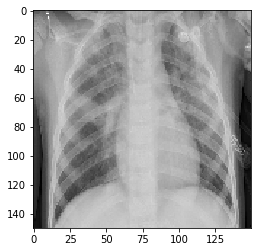

In [5]:
img_path = 'person3_virus_16.jpeg'

img = image.load_img(img_path, target_size=(150, 150))

plt.imshow(img)
plt.show()

## Transform the Image to a Tensor and Visualize Again

Recall that you should always preprocess images into tensors when using deep learning. As such, preprocess this image and then redisplay the tensor.

(1, 150, 150, 3)


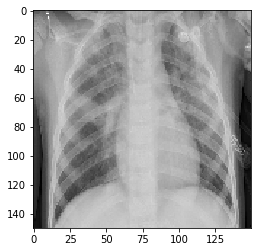

In [6]:
# Your code here

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.

print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

## Plot Feature Maps

Now that you've loaded a model, practice visualizing each of the channels for each of feature maps of the convolutional layers. Recall that this process will take a few steps. First, extract the feature maps, or layer outputs from each of the activation functions in the model. From there, generate models that transform the image from its raw state to these feature maps. You can then take these transformations and visualize each channel for each feature map.  

To preview the results of the solution code, take a sneek peak at the *Intermediate_Activations_Visualized.pdf* file.

In [7]:
# Your code here
from keras import models

In [8]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [11]:
# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

# Extract Layer Names for Labelling
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

In [16]:
def display_activations_for_layer(activation, layer_name):
    num_outputs = activation.shape[-1]
    num_rows = num_outputs // 4
    
    print(layer_name)
    
    fig, axes = plt.subplots(num_rows, 4, figsize=(12,24))
    for i in range(num_outputs):
        row = i//4
        column = i%4
        ax = axes[row, column]
        ax.matshow(activation[0, :, :, i], cmap='viridis')
    plt.show()

conv2d_1
conv2d_1


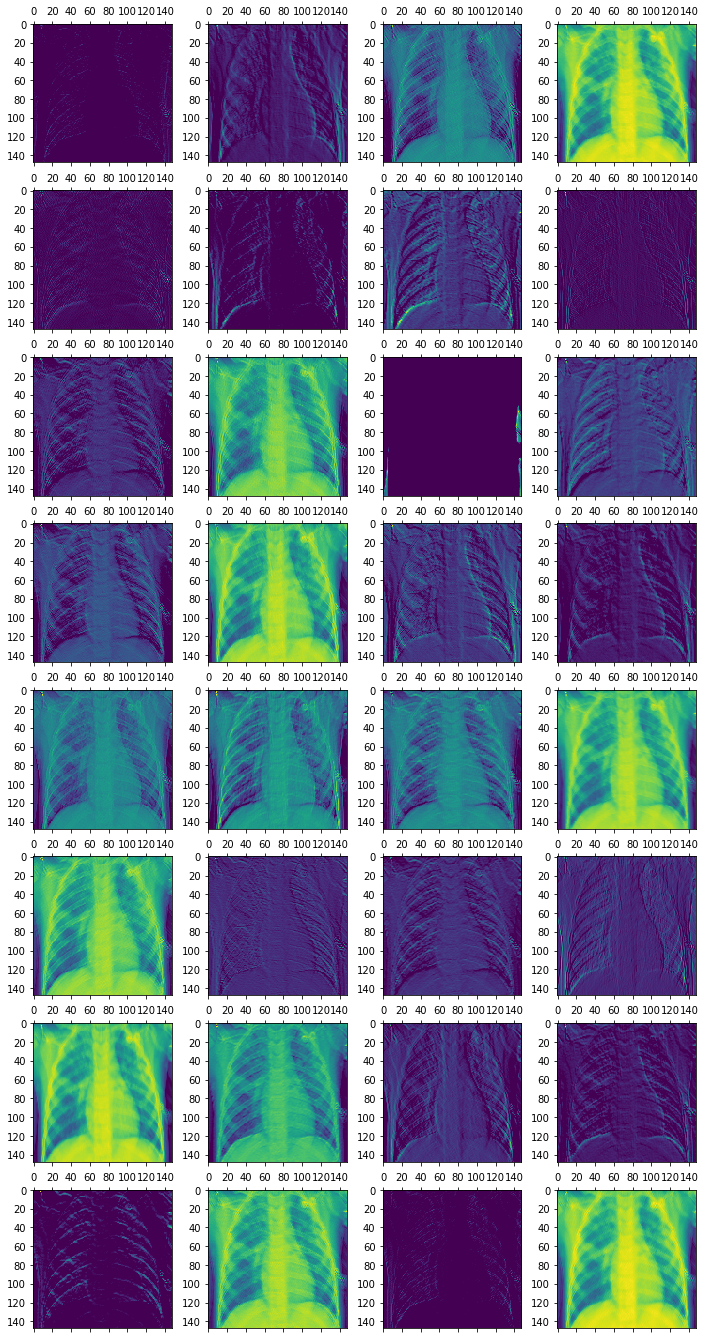

max_pooling2d_1
max_pooling2d_1


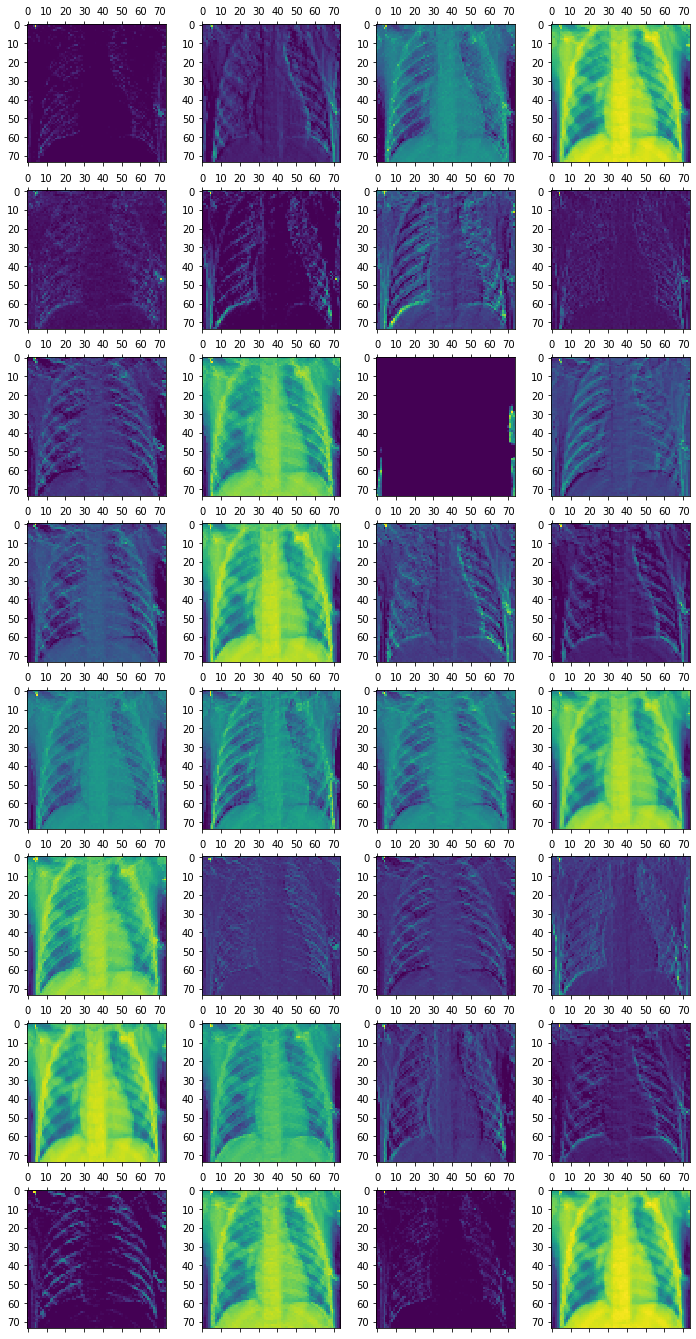

conv2d_2
conv2d_2


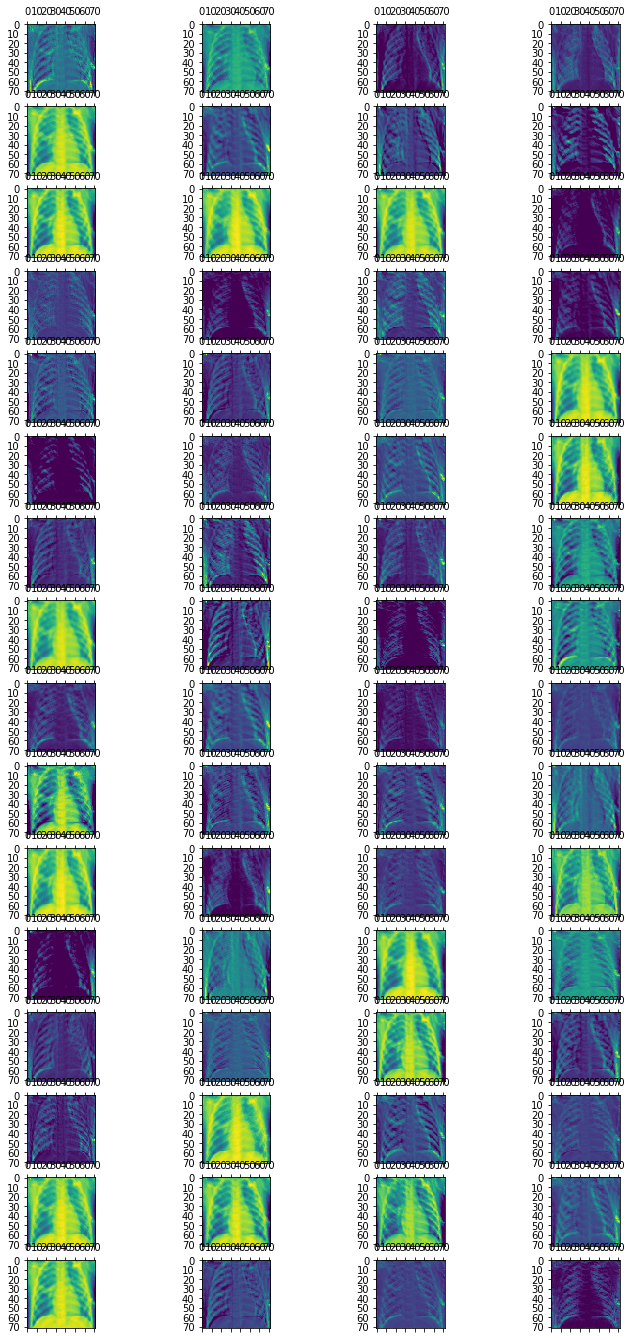

max_pooling2d_2
max_pooling2d_2


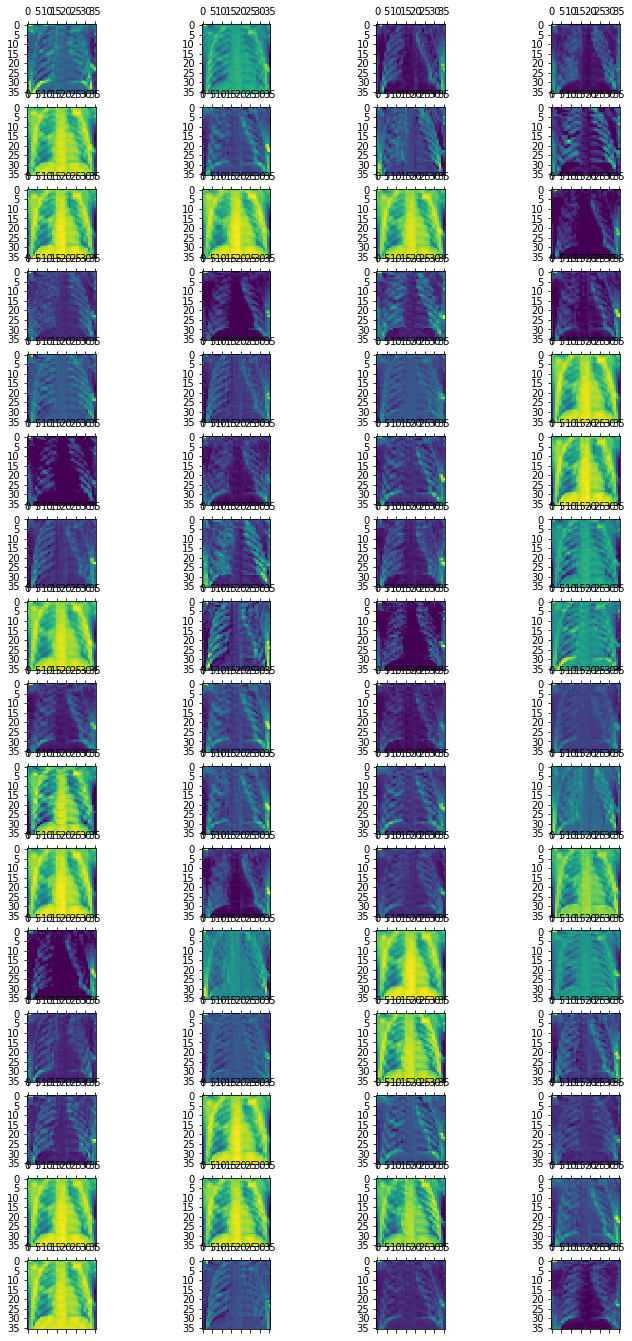

conv2d_3
conv2d_3


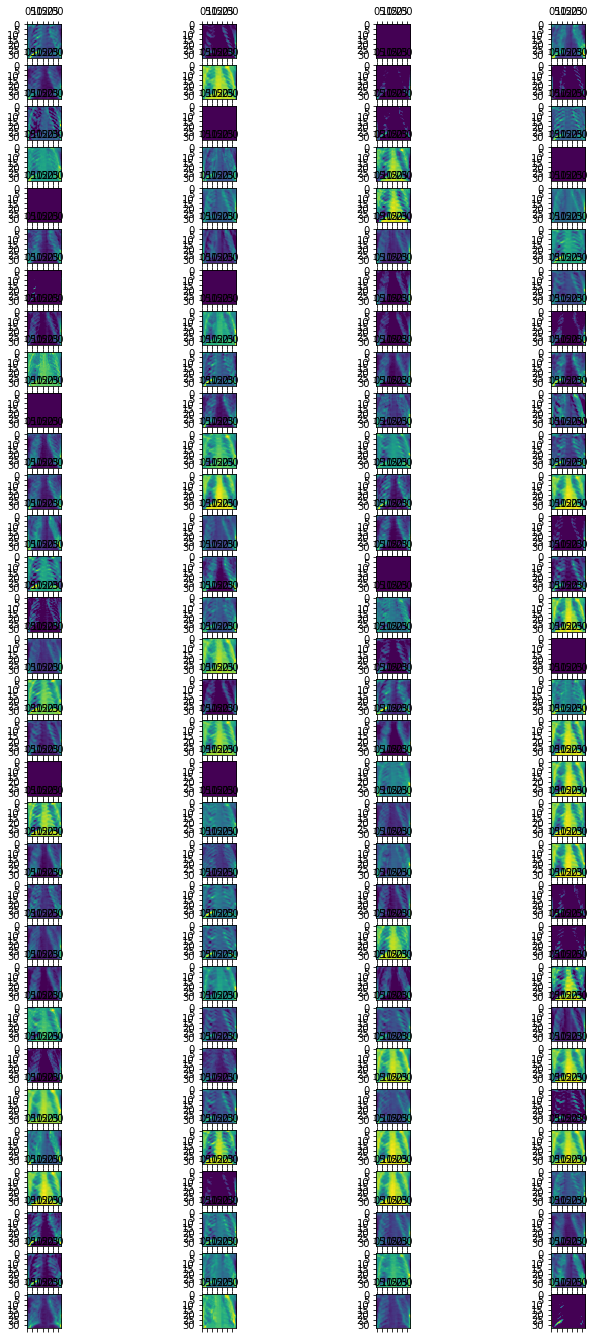

max_pooling2d_3
max_pooling2d_3


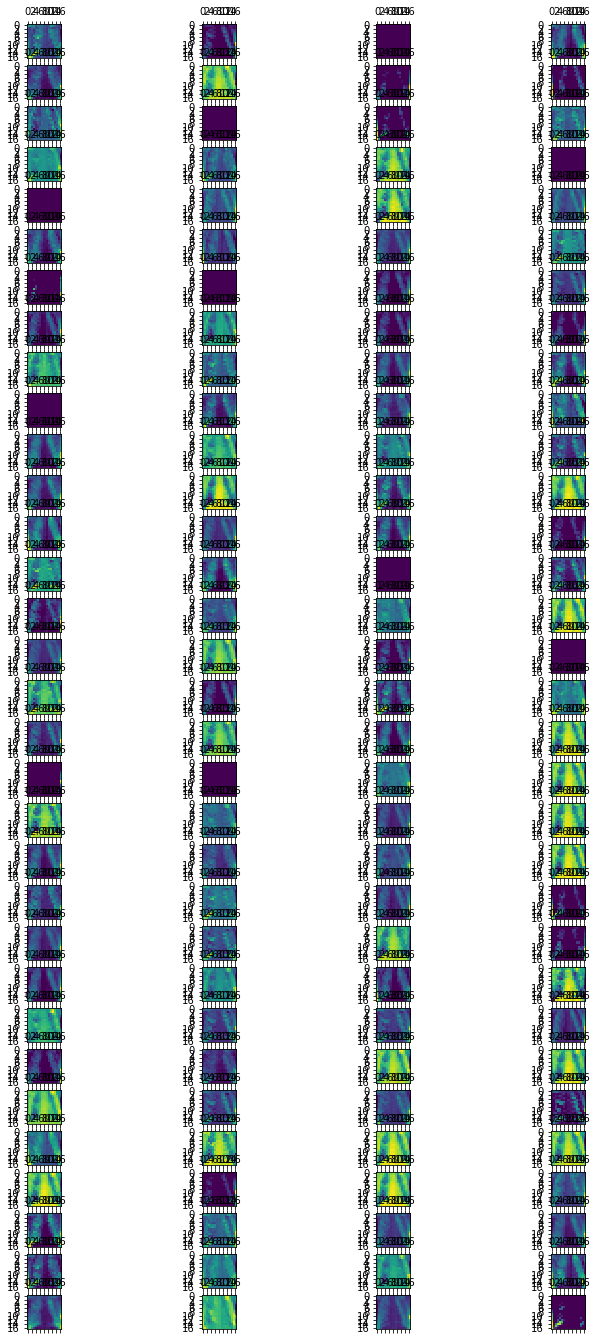

conv2d_4
conv2d_4


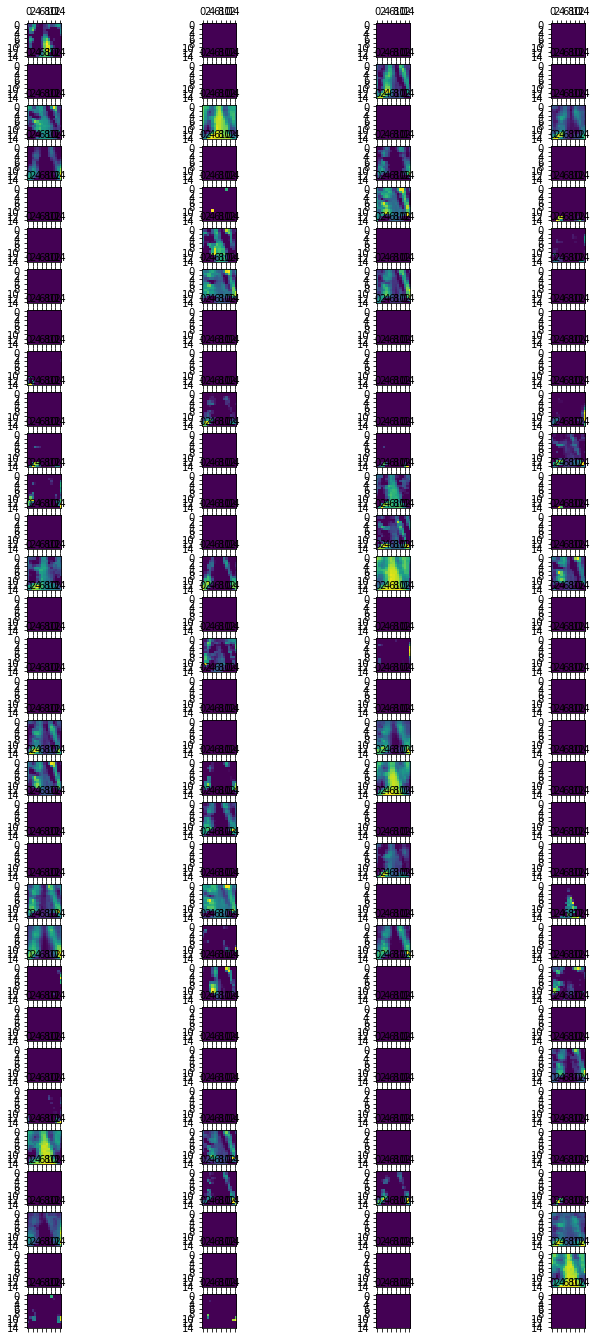

max_pooling2d_4
max_pooling2d_4


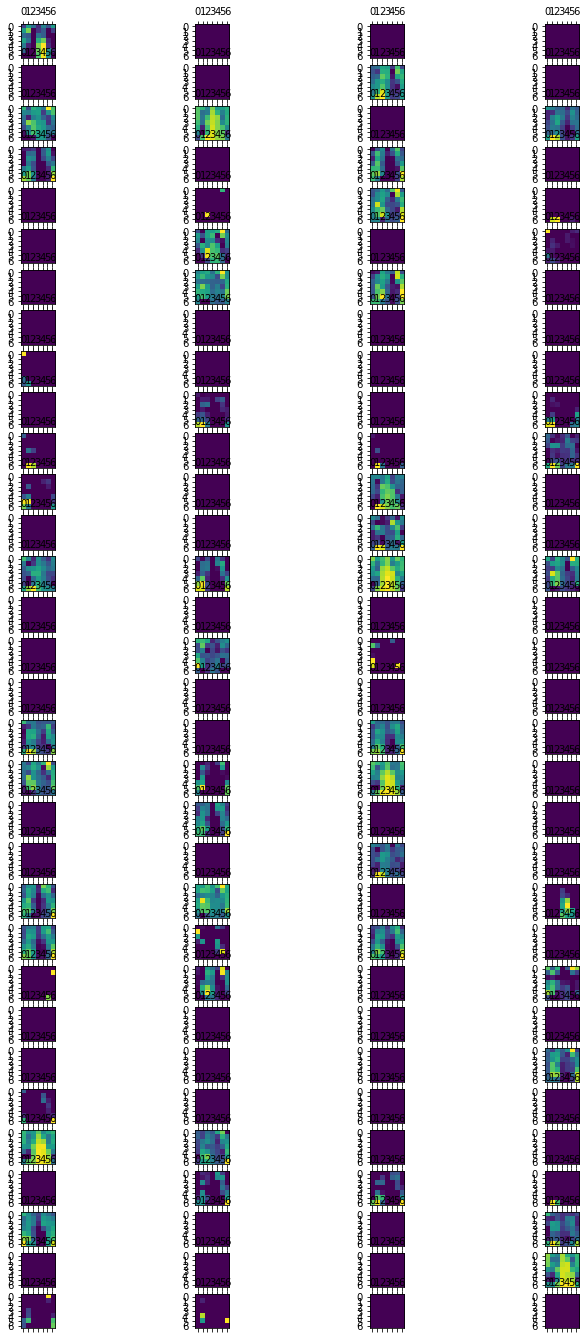

In [17]:
for i, activation in enumerate(activations):
    print(layer_names[i])
    display_activations_for_layer(activation, layer_names[i])

## Summary

Nice work! In this lab, you practiced loading a model and then visualizing the activation feature maps learned by that model on your data! In the upcoming labs and sections you will build upon the first part of this and see how you can adapt the representations learned by more experienced models to your own applications which may have limited training data.